In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import torch 
from Curriculum import Curriculum
from GenerateDataCurriculum import GenerateDataCurriculum
from GenerateDataLM_Examples import make_lm_program_gamma_gamma

In [17]:
N = 100
N_EPOCHS = 100
N_SAMPLES_PER_EPOCH = 1000

In [18]:
curriculum = Curriculum(max_iter=N_EPOCHS*N_SAMPLES_PER_EPOCH)

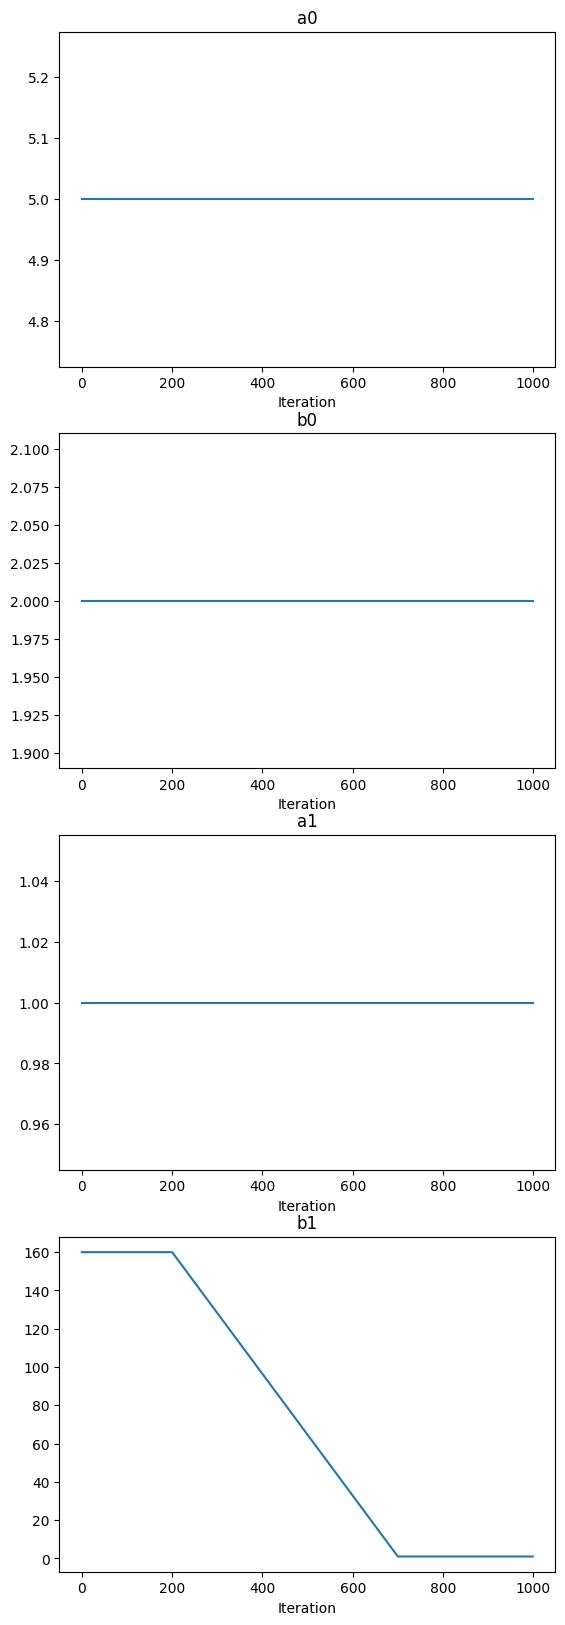

In [19]:
curriculum.add_param_list(
    [
    ("a0", curriculum.constant_scheduler(5.0)),
    ("b0", curriculum.constant_scheduler(2.0)),
    ("a1", curriculum.exponential_scheduler(1, 1)),
    ("b1", curriculum.constant_than_linear_than_constant_scheduler(160, 1, fraction_constant_beginning=0.2, fraction_constant_end=0.3))
    #("b1", curriculum.linear_scheduler(160, 1))
    ]
)
curriculum.plot_all_schedules()

In [20]:
curriculum.get_params(0)

{'a0': 5.0, 'b0': 2.0, 'a1': 1.0, 'b1': 160}

In [21]:
curriculum.get_params(49*N_EPOCHS)

{'a0': 5.0, 'b0': 2.0, 'a1': 1.0, 'b1': 160}

In [22]:
data_generator = GenerateDataCurriculum(
    pprogram_maker=make_lm_program_gamma_gamma,
    curriculum= curriculum,
)

In [23]:
N_SAMPLES_PER_EPOCH

1000

####################################################################################################
Epoch 0


100%|██████████| 1000/1000 [00:02<00:00, 445.89it/s]


Discarded 0 samples
{'X': {'mean': tensor(0.4999), 'variance': tensor(0.0834), 'min': tensor(1.2517e-06), 'max': tensor(1.0000)}, 'y': {'mean': tensor(0.0089), 'variance': tensor(2.5407), 'min': tensor(-9.9358), 'max': tensor(10.3287)}, 'beta': {'mean': tensor([-0.0265, -0.0308,  0.0746]), 'variance': tensor([2.4745, 2.4940, 2.7112]), 'min': tensor([-6.8006, -6.6883, -5.8758]), 'max': tensor([5.1225, 5.8979, 6.1873])}}
Statistics for sigma_squared:
Mean: 0.006094972603023052
Variance: 3.388257755432278e-05
Min: 6.065261004550848e-06
Max: 0.03855010122060776


Statistics for beta_var:
Mean: 2.5521891117095947
Variance: 1.321272850036621
Min: 0.1822446882724762
Max: 7.306371212005615




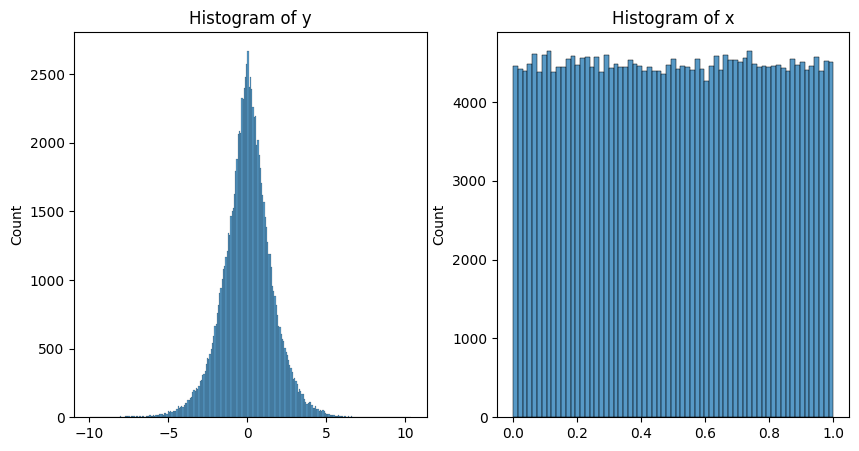

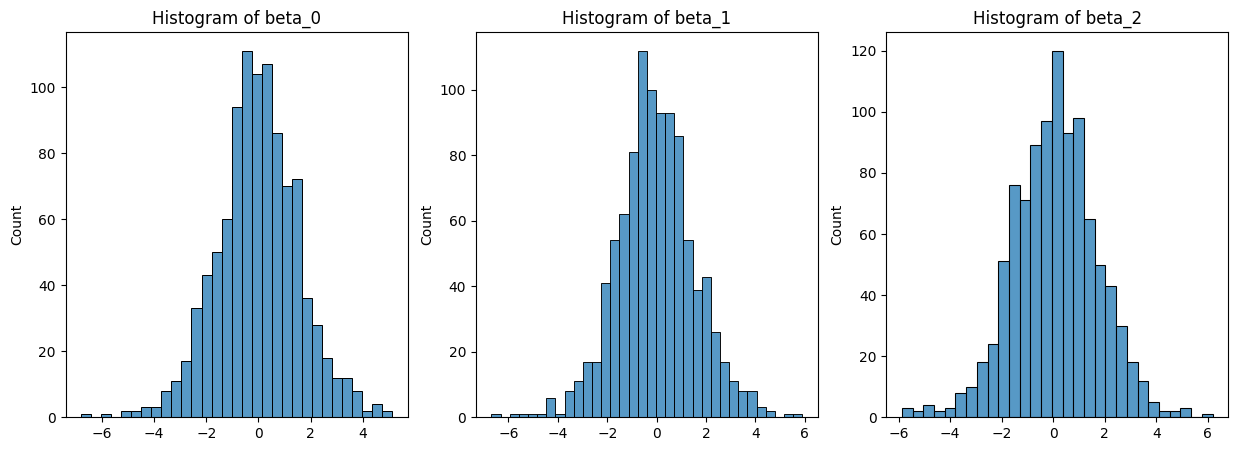

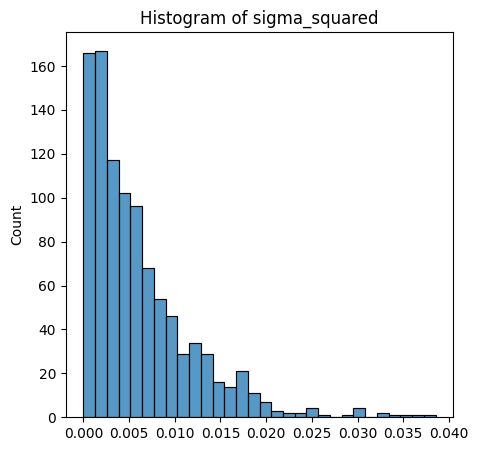

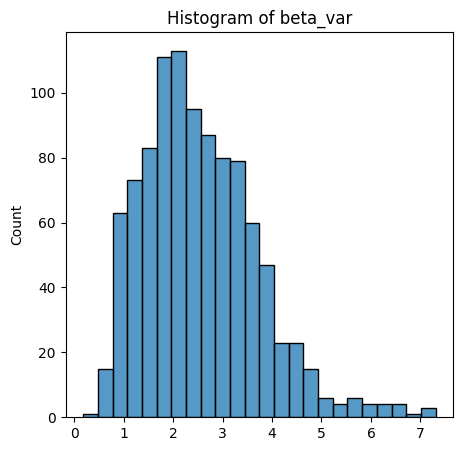

####################################################################################################
Epoch 99


100%|██████████| 1000/1000 [00:01<00:00, 914.09it/s]


Discarded 0 samples
{'X': {'mean': tensor(0.4998), 'variance': tensor(0.0833), 'min': tensor(2.0862e-06), 'max': tensor(1.0000)}, 'y': {'mean': tensor(0.0923), 'variance': tensor(4.3674), 'min': tensor(-20.5268), 'max': tensor(18.9592)}, 'beta': {'mean': tensor([0.0282, 0.1156, 0.0310]), 'variance': tensor([2.4542, 2.4164, 2.5541]), 'min': tensor([-4.7000, -5.8203, -4.8874]), 'max': tensor([5.3867, 5.4517, 6.8113])}}
Statistics for sigma_squared:
Mean: 0.9891362190246582
Variance: 0.92783123254776
Min: 0.0006896118866279721
Max: 7.508941650390625


Statistics for beta_var:
Mean: 2.461577892303467
Variance: 1.2322077751159668
Min: 0.32121625542640686
Max: 7.202929973602295




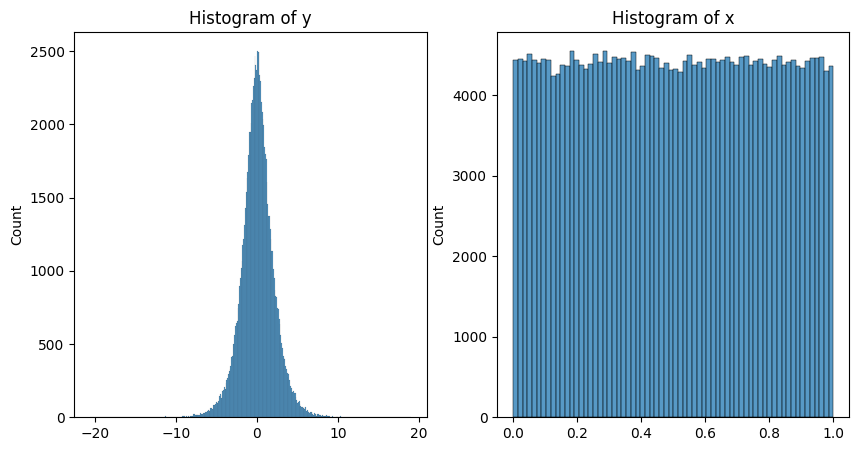

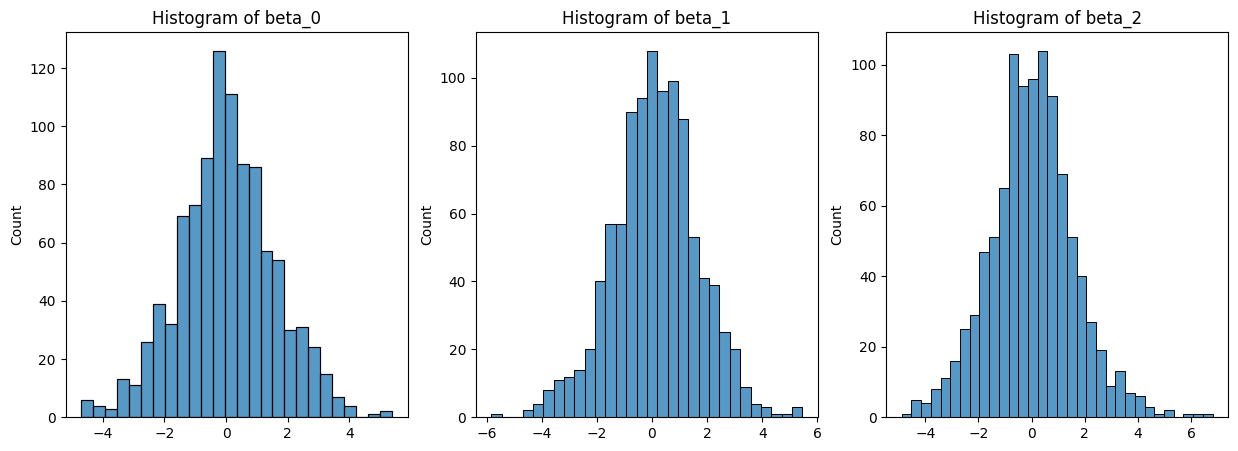

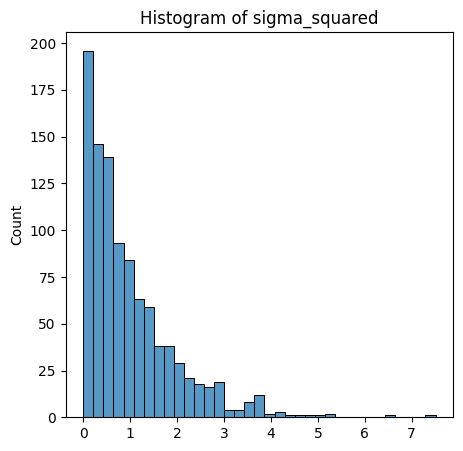

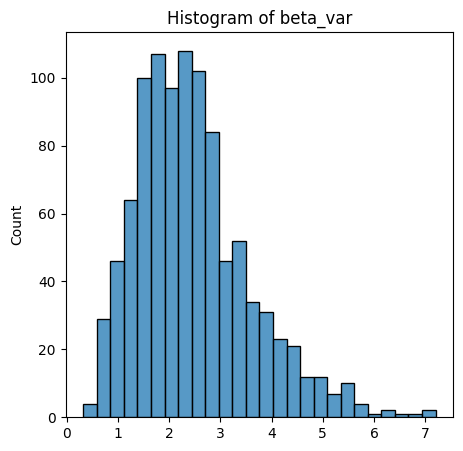

[{'X': {'mean': tensor(0.4999),
   'variance': tensor(0.0834),
   'min': tensor(1.2517e-06),
   'max': tensor(1.0000)},
  'y': {'mean': tensor(0.0089),
   'variance': tensor(2.5407),
   'min': tensor(-9.9358),
   'max': tensor(10.3287)},
  'beta': {'mean': tensor([-0.0265, -0.0308,  0.0746]),
   'variance': tensor([2.4745, 2.4940, 2.7112]),
   'min': tensor([-6.8006, -6.6883, -5.8758]),
   'max': tensor([5.1225, 5.8979, 6.1873])}},
 {'X': {'mean': tensor(0.4998),
   'variance': tensor(0.0833),
   'min': tensor(2.0862e-06),
   'max': tensor(1.0000)},
  'y': {'mean': tensor(0.0923),
   'variance': tensor(4.3674),
   'min': tensor(-20.5268),
   'max': tensor(18.9592)},
  'beta': {'mean': tensor([0.0282, 0.1156, 0.0310]),
   'variance': tensor([2.4542, 2.4164, 2.5541]),
   'min': tensor([-4.7000, -5.8203, -4.8874]),
   'max': tensor([5.3867, 5.4517, 6.8113])}}]

In [24]:
data_generator.check_model(
    n_batch=N_SAMPLES_PER_EPOCH,
    epochs_to_check = [0, N_EPOCHS-1]
)

In [26]:
epoch_loader = data_generator.make_epoch_loader(
    n = N_SAMPLES_PER_EPOCH,
    p = 100,
    n_batch = N_SAMPLES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= 1024,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=True
)

In [35]:
epoch_loader.GenerateDataCurriculum.curriculum.get_params(iter = 1)

{'a0': 5.0, 'b0': 2.0, 'a1': 1.0, 'b1': 160}

In [37]:
from Training.TrainerCurriculum import TrainerCurriculum